In [1]:
using LinearAlgebra
using Distributions
using FileIO
import JLD2
using DataFrames
using CairoMakie

In [2]:
using Revise
using Newtrinos
using Newtrinos.osc

[ Info: Precompiling Newtrinos [5b289081-bab5-45e8-97fc-86872f1653a0] (cache misses: include_dependency fsize change (2), wrong dep version loaded (2))
[ Info: Setting new default BAT context BATContext{Float64}(Random123.Philox4x{UInt64, 10}(0xca6844043236c0cc, 0x37a25ff64d843f61, 0xab798fe895aca965, 0x840072a621e1decd, 0xffb5473ba72b9913, 0x913ee1b93de96bec, 0x0000000000000000, 0x0000000000000000, 0x0000000000000000, 0x0000000000000000, 0), HeterogeneousComputing.CPUnit(), BAT._NoADSelected())


In [3]:

#STANDARD MODEL

osc_cfg_SM = Newtrinos.osc.OscillationConfig(
    flavour=Newtrinos.osc.ThreeFlavour(),
    propagation=Newtrinos.osc.Basic(),
    states=Newtrinos.osc.All(),
    interaction=Newtrinos.osc.SI()
    )

osc = Newtrinos.osc.configure(osc_cfg_SM)

physics_SM = (; osc);

experiments_SM = (

   katrin= Newtrinos.katrin.configure(physics_SM),
);

p = Newtrinos.get_params(experiments_SM)

[ Info: Loading Katrin data


(m₀ = 0.1, Δm²₂₁ = 7.53e-5, Δm²₃₁ = 0.0024752999999999997, δCP = 1.0, θ₁₂ = 0.5872523687443223, θ₁₃ = 0.1454258194533693, θ₂₃ = 0.8556288707523761)

In [4]:

all_priors = Newtrinos.get_priors(experiments_SM)


vars_to_scan = (m₀=31, Δm²₃₁=31)  

modified_priors = (
    #N = par.N,
    m₀ =all_priors.m₀,
    #r = all_priors.r,
    
   
  

    Δm²₂₁ = p.Δm²₂₁,
    Δm²₃₁ = all_priors.Δm²₃₁,
    δCP = p.δCP,
    θ₁₂ = p.θ₁₂,
    θ₁₃ = all_priors.θ₁₃,
    θ₂₃ =p.θ₂₃
)
    


(m₀ = Uniform{Float64}(a=0.001, b=2.0), Δm²₂₁ = 7.53e-5, Δm²₃₁ = Uniform{Float64}(a=0.002, b=0.003), δCP = 1.0, θ₁₂ = 0.5872523687443223, θ₁₃ = Uniform{Float64}(a=0.1, b=0.2), θ₂₃ = 0.8556288707523761)

In [5]:
likelihood = Newtrinos.generate_likelihood(experiments_SM);

result = Newtrinos.scan(likelihood, modified_priors, vars_to_scan, p)

LoadError: TaskFailedException

[91m    nested task error: [39mtype NamedTuple has no field N
    Stacktrace:
      [1] [0m[1mgetindex[22m
    [90m    @[39m [90m./[39m[90m[4mnamedtuple.jl:168[24m[39m[90m [inlined][39m
      [2] [0m[1m(::Newtrinos.katrin.var"#NeutrinoMassNND#3"{NND})[22m[0m[1m([22m[90mparams[39m::[0m@NamedTuple[90m{m₀::Float64, Δm²₂₁::Float64, Δm²₃₁::Float64, δCP::Float64, θ₁₂::Float64, θ₁₃::Float64, θ₂₃::Float64}[39m[0m[1m)[22m
    [90m    @[39m [35mNewtrinos.katrin[39m [90m~/Newtrinos.jl/src/experiments/katrin/[39m[90m[4mkatrin_NN.jl:208[24m[39m
      [3] [0m[1m(::Newtrinos.katrin.var"#forward_model#5")[22m[0m[1m([22m[90mparams[39m::[0m@NamedTuple[90m{m₀::Float64, Δm²₂₁::Float64, Δm²₃₁::Float64, δCP::Float64, θ₁₂::Float64, θ₁₃::Float64, θ₂₃::Float64}[39m[0m[1m)[22m
    [90m    @[39m [35mNewtrinos.katrin[39m [90m~/Newtrinos.jl/src/experiments/katrin/[39m[90m[4mkatrin_NN.jl:299[24m[39m
      [4] [0m[1mapplyf[22m
    [90m    @[39m [90m~/.julia/packages/FunctionChains/iVpMF/src/[39m[90m[4mapplyf.jl:18[24m[39m[90m [inlined][39m
      [5] [0m[1m(::Base.Fix2{typeof(FunctionChains.applyf), @NamedTuple{m₀::Float64, Δm²₂₁::Float64, Δm²₃₁::Float64, δCP::Float64, θ₁₂::Float64, θ₁₃::Float64, θ₂₃::Float64}})[22m[0m[1m([22m[90my[39m::[0mFunction[0m[1m)[22m
    [90m    @[39m [90mBase[39m [90m./[39m[90m[4moperators.jl:1144[24m[39m
      [6] [0m[1mmap[22m
    [90m    @[39m [90m./[39m[90m[4mtuple.jl:355[24m[39m[90m [inlined][39m
      [7] [0m[1m(::FunctionChains.FFanout{@NamedTuple{katrin::Newtrinos.katrin.var"#forward_model#5"}})[22m[0m[1m([22m[90mx[39m::[0m@NamedTuple[90m{m₀::Float64, Δm²₂₁::Float64, Δm²₃₁::Float64, δCP::Float64, θ₁₂::Float64, θ₁₃::Float64, θ₂₃::Float64}[39m[0m[1m)[22m
    [90m    @[39m [36mFunctionChains[39m [90m~/.julia/packages/FunctionChains/iVpMF/src/[39m[90m[4mffanout.jl:63[24m[39m
      [8] [0m[1mcall_composed[22m[0m[1m([22m[90mfs[39m::[0mTuple[90m{FunctionChains.FFanout{@NamedTuple{katrin::Newtrinos.katrin.var"#forward_model#5"}}}[39m, [90mx[39m::[0mTuple[90m{@NamedTuple{m₀::Float64, Δm²₂₁::Float64, Δm²₃₁::Float64, δCP::Float64, θ₁₂::Float64, θ₁₃::Float64, θ₂₃::Float64}}[39m, [90mkw[39m::[0m@Kwargs[90m{}[39m[0m[1m)[22m
    [90m    @[39m [90mBase[39m [90m./[39m[90m[4moperators.jl:1054[24m[39m
      [9] [0m[1mcall_composed[22m
    [90m    @[39m [90m./[39m[90m[4moperators.jl:1053[24m[39m[90m [inlined][39m
     [10] [0m[1m(::ComposedFunction{typeof(BAT.distprod), FunctionChains.FFanout{@NamedTuple{katrin::Newtrinos.katrin.var"#forward_model#5"}}})[22m[0m[1m([22m[90mx[39m::[0m@NamedTuple[90m{m₀::Float64, Δm²₂₁::Float64, Δm²₃₁::Float64, δCP::Float64, θ₁₂::Float64, θ₁₃::Float64, θ₂₃::Float64}[39m; [90mkw[39m::[0m@Kwargs[90m{}[39m[0m[1m)[22m
    [90m    @[39m [90mBase[39m [90m./[39m[90m[4moperators.jl:1050[24m[39m
     [11] [0m[1mlogdensityof[22m
    [90m    @[39m [90m~/.julia/packages/MeasureBase/t8sMc/src/combinators/[39m[90m[4mlikelihood.jl:142[24m[39m[90m [inlined][39m
     [12] [0m[1mmacro expansion[22m
    [90m    @[39m [90m~/Newtrinos.jl/src/analysis/[39m[90m[4manalysis_tools.jl:238[24m[39m[90m [inlined][39m
     [13] [0m[1m(::Newtrinos.var"#137#threadsfor_fun#24"{Newtrinos.var"#137#threadsfor_fun#17#25"{Bool, MeasureBase.Likelihood{ComposedFunction{typeof(BAT.distprod), FunctionChains.FFanout{@NamedTuple{katrin::Newtrinos.katrin.var"#forward_model#5"}}}, @NamedTuple{katrin::Float64}}, ProgressMeter.Progress, Matrix{Any}, Matrix{Any}, Base.OneTo{Int64}}})[22m[0m[1m([22m[90mtid[39m::[0mInt64; [90monethread[39m::[0mBool[0m[1m)[22m
    [90m    @[39m [35mNewtrinos[39m [90m./[39m[90m[4mthreadingconstructs.jl:253[24m[39m
     [14] [0m[1m#137#threadsfor_fun[22m
    [90m    @[39m [90m./[39m[90m[4mthreadingconstructs.jl:220[24m[39m[90m [inlined][39m
     [15] [0m[1m(::Base.Threads.var"#1#2"{Newtrinos.var"#137#threadsfor_fun#24"{Newtrinos.var"#137#threadsfor_fun#17#25"{Bool, MeasureBase.Likelihood{ComposedFunction{typeof(BAT.distprod), FunctionChains.FFanout{@NamedTuple{katrin::Newtrinos.katrin.var"#forward_model#5"}}}, @NamedTuple{katrin::Float64}}, ProgressMeter.Progress, Matrix{Any}, Matrix{Any}, Base.OneTo{Int64}}}, Int64})[22m[0m[1m([22m[0m[1m)[22m
    [90m    @[39m [90mBase.Threads[39m [90m./[39m[90m[4mthreadingconstructs.jl:154[24m[39m

...and 3 more exceptions.


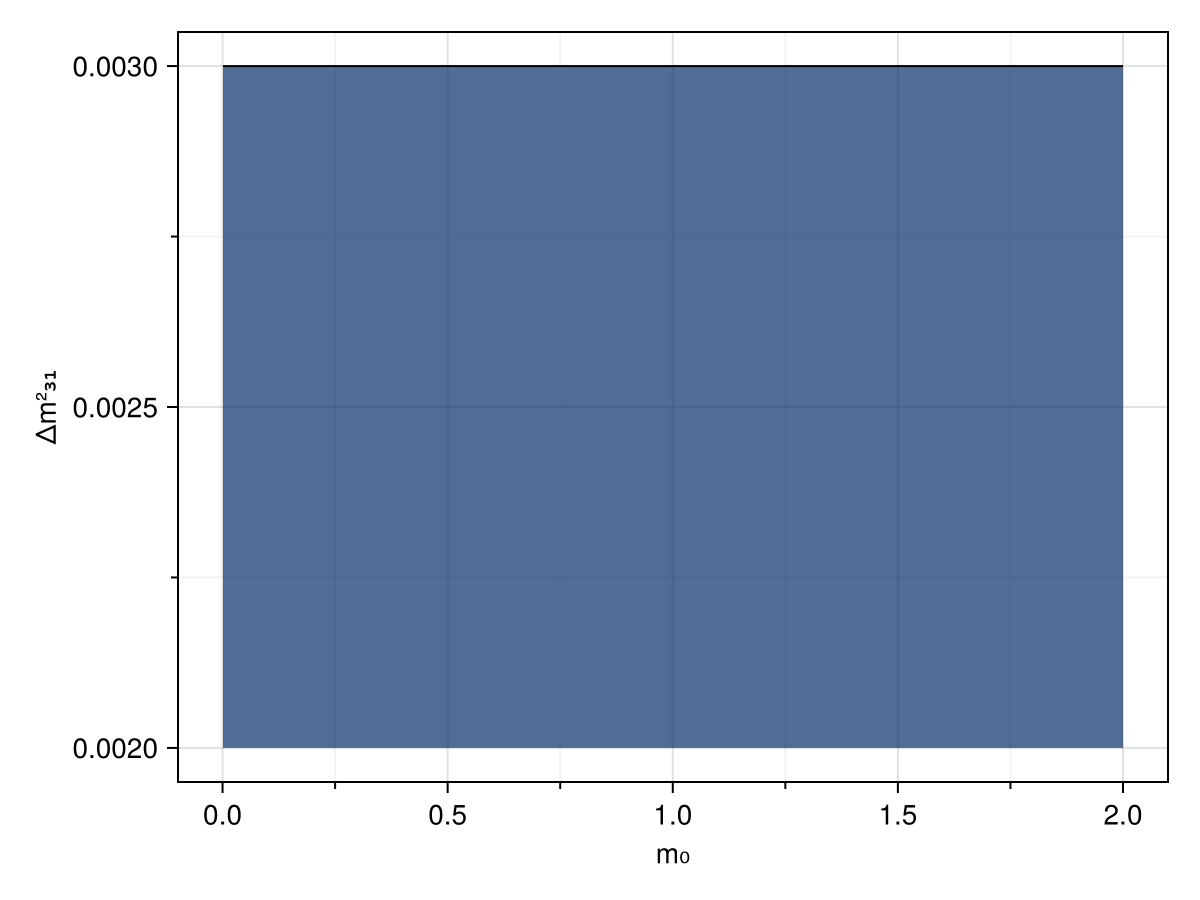

In [ ]:
#plot and save the image
img = CairoMakie.plot(result)
display("image/png", img)
#save("/home/sofialon/Newtrinos.jl/profiled plot/katrin/katrin_SM.png", img)

In [ ]:
println(result.values.log_posterior)

Any[-0.06198072386007536 -0.06198072386007536 -0.06198072386007536 -0.06198072386007536 -0.06198072386007536 -0.06198072386007536 -0.06198072386007536 -0.06198072386007536 -0.06198072386007536 -0.06198072386007536 -0.06198072386007536 -0.06198072386007536 -0.06198072386007536 -0.06198072386007536 -0.06198072386007536 -0.06198072386007536 -0.06198072386007536 -0.06198072386007536 -0.06198072386007536 -0.06198072386007536 -0.06198072386007536 -0.06198072386007536 -0.06198072386007536 -0.06198072386007536 -0.06198072386007536 -0.06198072386007536 -0.06198072386007536 -0.06198072386007536 -0.06198072386007536 -0.06198072386007536 -0.06198072386007536; -0.06198072386007536 -0.06198072386007536 -0.06198072386007536 -0.06198072386007536 -0.06198072386007536 -0.06198072386007536 -0.06198072386007536 -0.06198072386007536 -0.06198072386007536 -0.06198072386007536 -0.06198072386007536 -0.06198072386007536 -0.06198072386007536 -0.06198072386007536 -0.06198072386007536 -0.06198072386007536 -0.06198

rindex: 3


┌ Warning: Found `resolution` in the theme when creating a `Scene`. The `resolution` keyword for `Scene`s and `Figure`s has been deprecated. Use `Figure(; size = ...` or `Scene(; size = ...)` instead, which better reflects that this is a unitless size and not a pixel resolution. The key could also come from `set_theme!` calls or related theming functions.
└ @ Makie ~/.julia/packages/Makie/dYDv2/src/scenes.jl:238


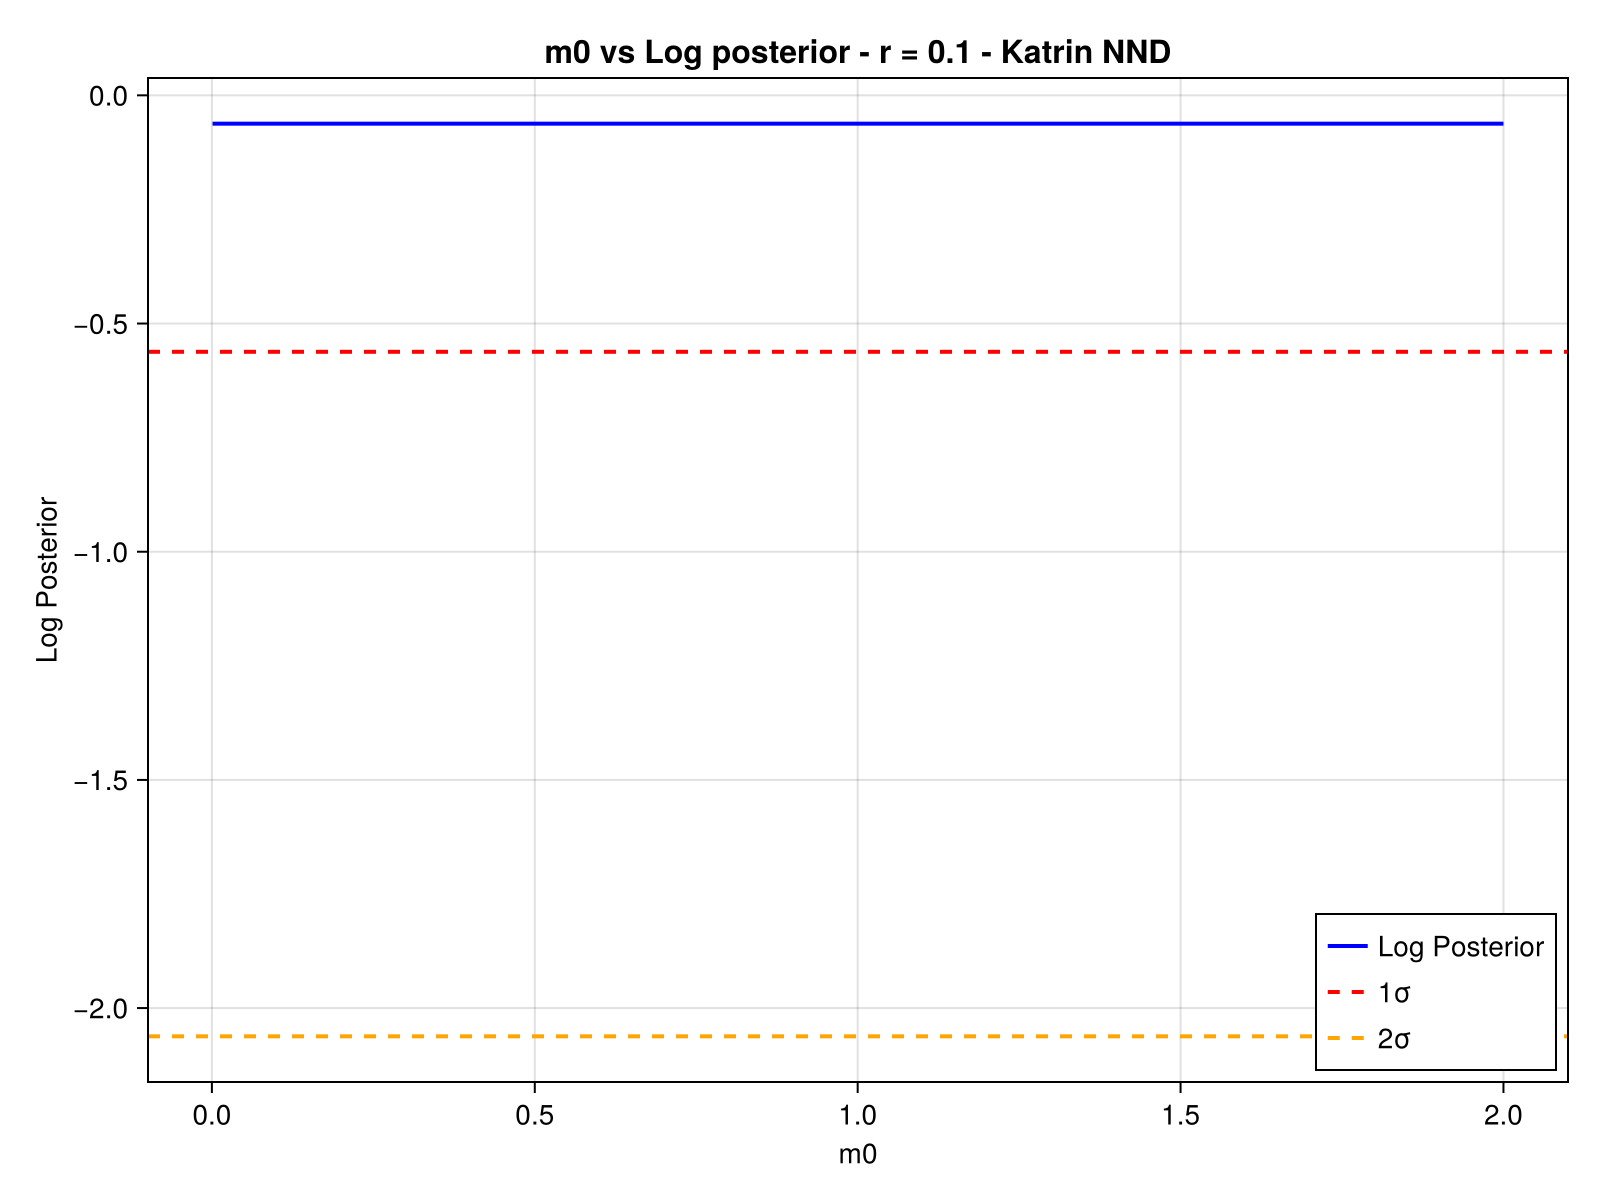

In [ ]:
#MODIFYYYY 

#value of r fixed
rfixed = 0.1
rmax=1
rindex = round(Int, 31/rmax* rfixed)
println("rindex: ", rindex)

#calsculate the best fit
bf = Newtrinos.bestfit(result)

# Calculate confidence intervals
sigma_1_threshold = maximum(result.values.log_posterior[rindex ,: ]) - 0.5
sigma_2_threshold = maximum(result.values.log_posterior[ rindex,: ]) - 2.0

# Create the plot
fig = Figure(resolution = (800, 600))
ax = Axis(fig[1, 1],
    xlabel = "m0",
    ylabel = "Log Posterior",
    title = "m0 vs Log posterior - r = $rfixed - Katrin NND",
    titlesize = 16,
    xlabelsize = 14,
    ylabelsize = 14
)

# Plot the main curve
lines!(ax, result.axes.m₀, result.values.log_posterior[rindex , :],
    color = :blue,
    linewidth = 2,
    label = "Log Posterior"
)

# Add confidence level lines
hlines!(ax, [sigma_1_threshold], 
    color = :red, 
    linestyle = :dash, 
    linewidth = 2,
    label = "1σ"
)

hlines!(ax, [sigma_2_threshold], 
    color = :orange, 
    linestyle = :dash, 
    linewidth = 2,
    label = "2σ"
)

# Add legend
axislegend(ax, position = :rb)  # right bottom

display("image/png", fig)
#save("/home/sofialon/Newtrinos.jl/profiled plot/katrin/katrin_m0Logpost_NND_N=50_r=$rfixed.png", fig)


In [6]:
using Revise
using Newtrinos
using Newtrinos.osc

In [1]:
#NNATURALNESS 
using Revise
using Newtrinos
using Newtrinos.osc


osc_cfg = Newtrinos.osc.OscillationConfig(
    flavour=Newtrinos.osc.NNM(),
    propagation=Newtrinos.osc.Basic(),
    states=Newtrinos.osc.All(),
    interaction=Newtrinos.osc.SI()
    )

osc = Newtrinos.osc.configure(osc_cfg)

physics = (; osc);


experiments = (

   katrin= Newtrinos.katrin.configure(physics),
);

par= Newtrinos.get_params(experiments)

matrix=Newtrinos.osc.get_matrices(osc_cfg.flavour)(par)

[ Info: Precompiling Newtrinos [5b289081-bab5-45e8-97fc-86872f1653a0] (cache misses: include_dependency fsize change (4))
[ Info: Setting new default BAT context BATContext{Float64}(Random123.Philox4x{UInt64, 10}(0x56c5b413f6bb495a, 0x1f730b7ac192e582, 0x4c84290773700e1c, 0x61284b0d37c5e3ec, 0x4b7d98ba99035c17, 0xd496b95f89910089, 0x0000000000000000, 0x0000000000000000, 0x0000000000000000, 0x0000000000000000, 0), HeterogeneousComputing.CPUnit(), BAT._NoADSelected())
[ Info: Loading Katrin data


(ComplexF64[-0.823559006035511 - 0.0im -0.5481473150987328 - 0.0im … -0.005481546035805803 - 0.0im -0.0007828688274756149 + 0.0012192459593020485im; 0.4124814108162824 + 0.07662837140482405im -0.5130567351441784 + 0.051002582374931445im … -0.005130635570415002 + 0.0005100326053458959im -0.007469152143127304 - 0.0im; … ; -0.0002891831078120794 - 5.372273757882172e-5im 0.00035969461232034675 - 3.575696962545894e-5im … -0.07239085289208125 + 0.007196319987461747im -0.10538622098586639 - 0.0im; 0.00026327162636680145 - 4.66610959552385e-5im -0.000460505719312328 - 3.105685722575349e-5im … 0.09267973620080566 + 0.0062503921541021005im -0.09153361856451647 - 0.0im], [0.0, 7.53e-5, 0.0024752999999999997, 0.08171625600906857, 0.08240687941681685, 0.10441878085899331, 0.24463360541891038, 0.24655099646771478, 0.3076630617682533, 0.4888649671195407  …  471.59516879785275, 386.0517463925226, 388.9587913428583, 481.6136104770638, 394.2702158290588, 397.23914585425166, 491.86639765322576, 1.0002666

In [2]:

all_priors = Newtrinos.get_priors(experiments)


vars_to_scan = ( r=31,  m₀=31)  

modified_priors = (
    N = all_priors.N,
    m₀ =all_priors.m₀,
    r = all_priors.r,
    
   
  

    Δm²₂₁ = par.Δm²₂₁,
    Δm²₃₁ = all_priors.Δm²₃₁,
    δCP = par.δCP,
    θ₁₂ = par.θ₁₂,
    θ₁₃ = all_priors.θ₁₃,
    θ₂₃ = par.θ₂₃
)
    


(N = Distributions.Uniform{Float64}(a=3.0, b=100.0), m₀ = Distributions.Uniform{Float64}(a=0.001, b=2.0), r = Distributions.Uniform{Float64}(a=1.0e-8, b=1.0), Δm²₂₁ = 7.53e-5, Δm²₃₁ = Distributions.Uniform{Float64}(a=0.002, b=0.003), δCP = 1.0, θ₁₂ = 0.5872523687443223, θ₁₃ = Distributions.Uniform{Float64}(a=0.1, b=0.2), θ₂₃ = 0.8556288707523761)

In [3]:
matrix=Newtrinos.osc.get_matrices(osc_cfg.flavour)(par)


(ComplexF64[-0.823559006035511 - 0.0im -0.5481473150987328 - 0.0im … -0.005481546035805803 - 0.0im -0.0007828688274756149 + 0.0012192459593020485im; 0.4124814108162824 + 0.07662837140482405im -0.5130567351441784 + 0.051002582374931445im … -0.005130635570415002 + 0.0005100326053458959im -0.007469152143127304 - 0.0im; … ; -0.0002891831078120794 - 5.372273757882172e-5im 0.00035969461232034675 - 3.575696962545894e-5im … -0.07239085289208125 + 0.007196319987461747im -0.10538622098586639 - 0.0im; 0.00026327162636680145 - 4.66610959552385e-5im -0.000460505719312328 - 3.105685722575349e-5im … 0.09267973620080566 + 0.0062503921541021005im -0.09153361856451647 - 0.0im], [0.0, 7.53e-5, 0.0024752999999999997, 0.08171625600906857, 0.08240687941681685, 0.10441878085899331, 0.24463360541891038, 0.24655099646771478, 0.3076630617682533, 0.4888649671195407  …  471.59516879785275, 386.0517463925226, 388.9587913428583, 481.6136104770638, 394.2702158290588, 397.23914585425166, 491.86639765322576, 1.0002666

In [4]:
par

(N = 100.0, m₀ = 0.1, r = 1.0, Δm²₂₁ = 7.53e-5, Δm²₃₁ = 0.0024752999999999997, δCP = 1.0, θ₁₂ = 0.5872523687443223, θ₁₃ = 0.1454258194533693, θ₂₃ = 0.8556288707523761)

In [5]:
nu_mass=Newtrinos.katrin.get_neutrinomass(osc_cfg.flavour)(par)

0.04771368262188095

In [6]:
likelihood_NN = Newtrinos.generate_likelihood(experiments);

result_NN = Newtrinos.scan(likelihood_NN, modified_priors, vars_to_scan, par)

Progress: 100%|█████████████████████████████████████████| Time: 0:00:11


NewtrinosResult((r = [1.0e-8, 0.033333343, 0.066666676, 0.100000009, 0.133333342, 0.166666675, 0.200000008, 0.233333341, 0.266666674, 0.30000000699999996  …  0.700000003, 0.733333336, 0.766666669, 0.8000000020000001, 0.8333333350000001, 0.866666668, 0.900000001, 0.9333333340000001, 0.966666667, 1.0], m₀ = [0.001, 0.06763333333333334, 0.13426666666666667, 0.20090000000000002, 0.26753333333333335, 0.33416666666666667, 0.40080000000000005, 0.46743333333333337, 0.5340666666666667, 0.6007  …  1.4002999999999999, 1.4669333333333332, 1.5335666666666667, 1.6002, 1.6668333333333334, 1.7334666666666667, 1.8001, 1.8667333333333334, 1.9333666666666667, 2.0]), (N = [100.0 100.0 … 100.0 100.0; 100.0 100.0 … 100.0 100.0; … ; 100.0 100.0 … 100.0 100.0; 100.0 100.0 … 100.0 100.0], Δm²₂₁ = [7.53e-5 7.53e-5 … 7.53e-5 7.53e-5; 7.53e-5 7.53e-5 … 7.53e-5 7.53e-5; … ; 7.53e-5 7.53e-5 … 7.53e-5 7.53e-5; 7.53e-5 7.53e-5 … 7.53e-5 7.53e-5], Δm²₃₁ = [0.0024752999999999997 0.0024752999999999997 … 0.00247529999999

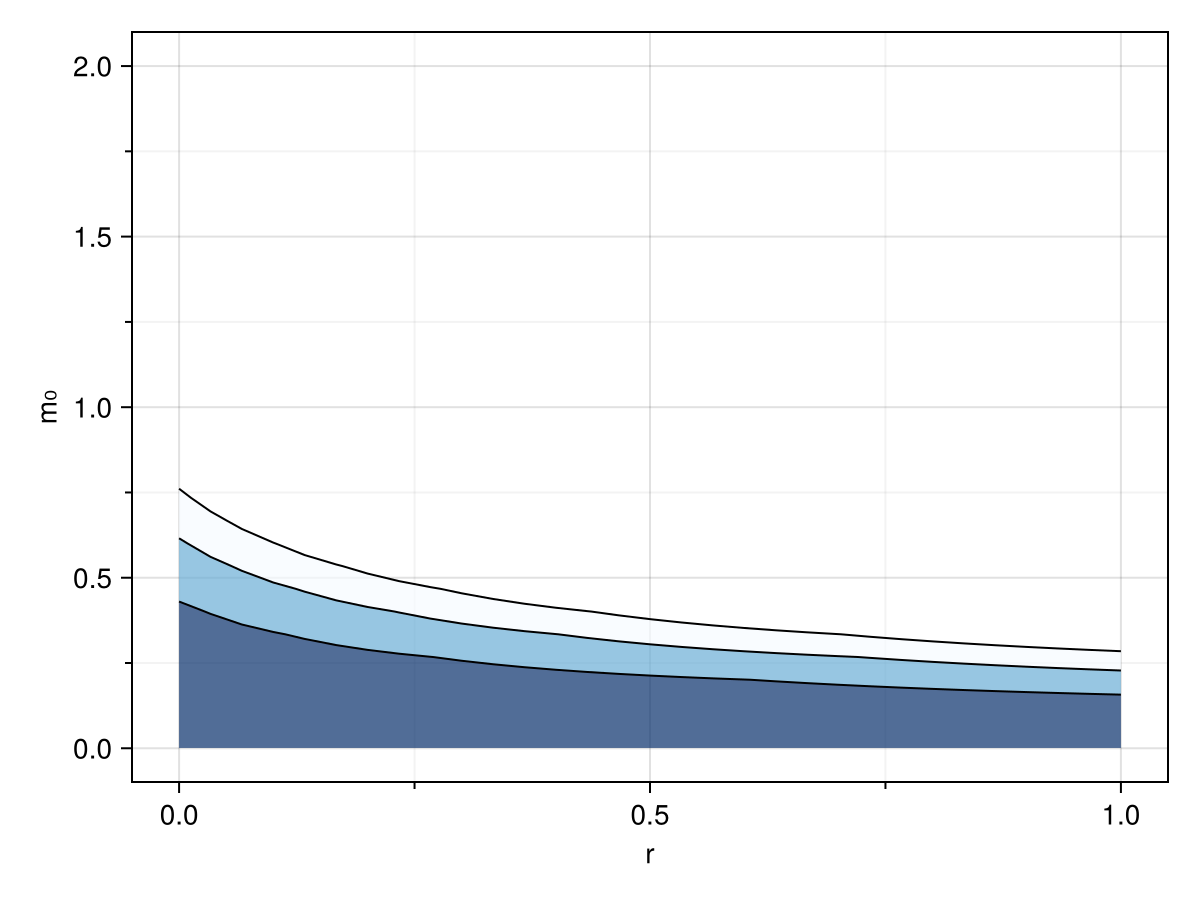

In [7]:
#plot and save the image
using CairoMakie
img = CairoMakie.plot(result_NN)
display("image/png", img)
#save("/home/sofialon/Newtrinos.jl/profiled plot/katrin/katrin_rm0_NND_N1000.png", img)

rindex: 3


┌ Warning: Found `resolution` in the theme when creating a `Scene`. The `resolution` keyword for `Scene`s and `Figure`s has been deprecated. Use `Figure(; size = ...` or `Scene(; size = ...)` instead, which better reflects that this is a unitless size and not a pixel resolution. The key could also come from `set_theme!` calls or related theming functions.
└ @ Makie ~/.julia/packages/Makie/dYDv2/src/scenes.jl:238


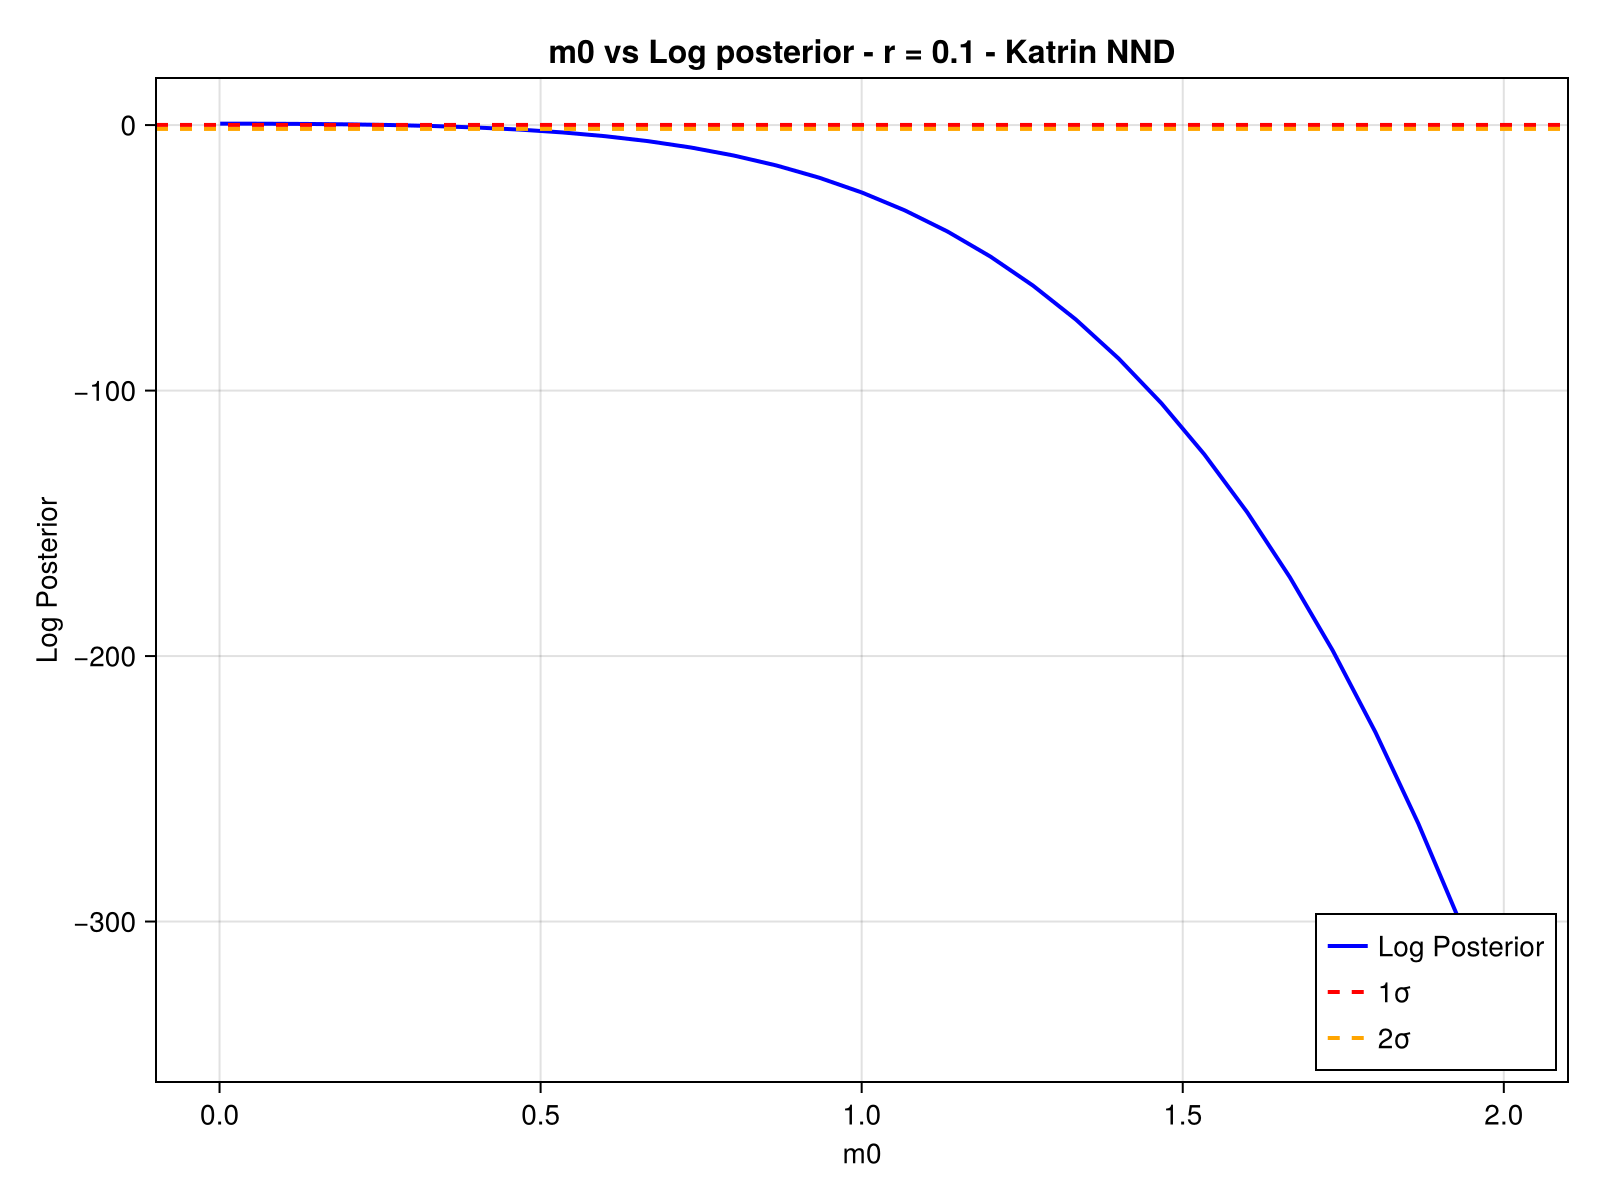

In [10]:
#plot the logposterior value vs r
result = result_NN

#value of r fixed
rfixed = 0.1
rmax=1
rindex = round(Int, 31/rmax* rfixed)
println("rindex: ", rindex)

#calsculate the best fit
bf = Newtrinos.bestfit(result)

# Calculate confidence intervals
sigma_1_threshold = maximum(result.values.log_posterior[rindex ,: ]) - 0.5
sigma_2_threshold = maximum(result.values.log_posterior[ rindex,: ]) - 2.0

# Create the plot
fig = Figure(resolution = (800, 600))
ax = Axis(fig[1, 1],
    xlabel = "m0",
    ylabel = "Log Posterior",
    title = "m0 vs Log posterior - r = $rfixed - Katrin NND",
    titlesize = 16,
    xlabelsize = 14,
    ylabelsize = 14
)

# Plot the main curve
lines!(ax, result.axes.m₀, result.values.log_posterior[rindex , :],
    color = :blue,
    linewidth = 2,
    label = "Log Posterior"
)

# Add confidence level lines
hlines!(ax, [sigma_1_threshold], 
    color = :red, 
    linestyle = :dash, 
    linewidth = 2,
    label = "1σ"
)

hlines!(ax, [sigma_2_threshold], 
    color = :orange, 
    linestyle = :dash, 
    linewidth = 2,
    label = "2σ"
)

# Add legend
axislegend(ax, position = :rb)  # right bottom

display("image/png", fig)
#save("/home/sofialon/Newtrinos.jl/profiled plot/katrin/katrin_m0Logpost_NND_N=50_r=$rfixed.png", fig)


m0index: 5


┌ Warning: Found `resolution` in the theme when creating a `Scene`. The `resolution` keyword for `Scene`s and `Figure`s has been deprecated. Use `Figure(; size = ...` or `Scene(; size = ...)` instead, which better reflects that this is a unitless size and not a pixel resolution. The key could also come from `set_theme!` calls or related theming functions.
└ @ Makie ~/.julia/packages/Makie/dYDv2/src/scenes.jl:238


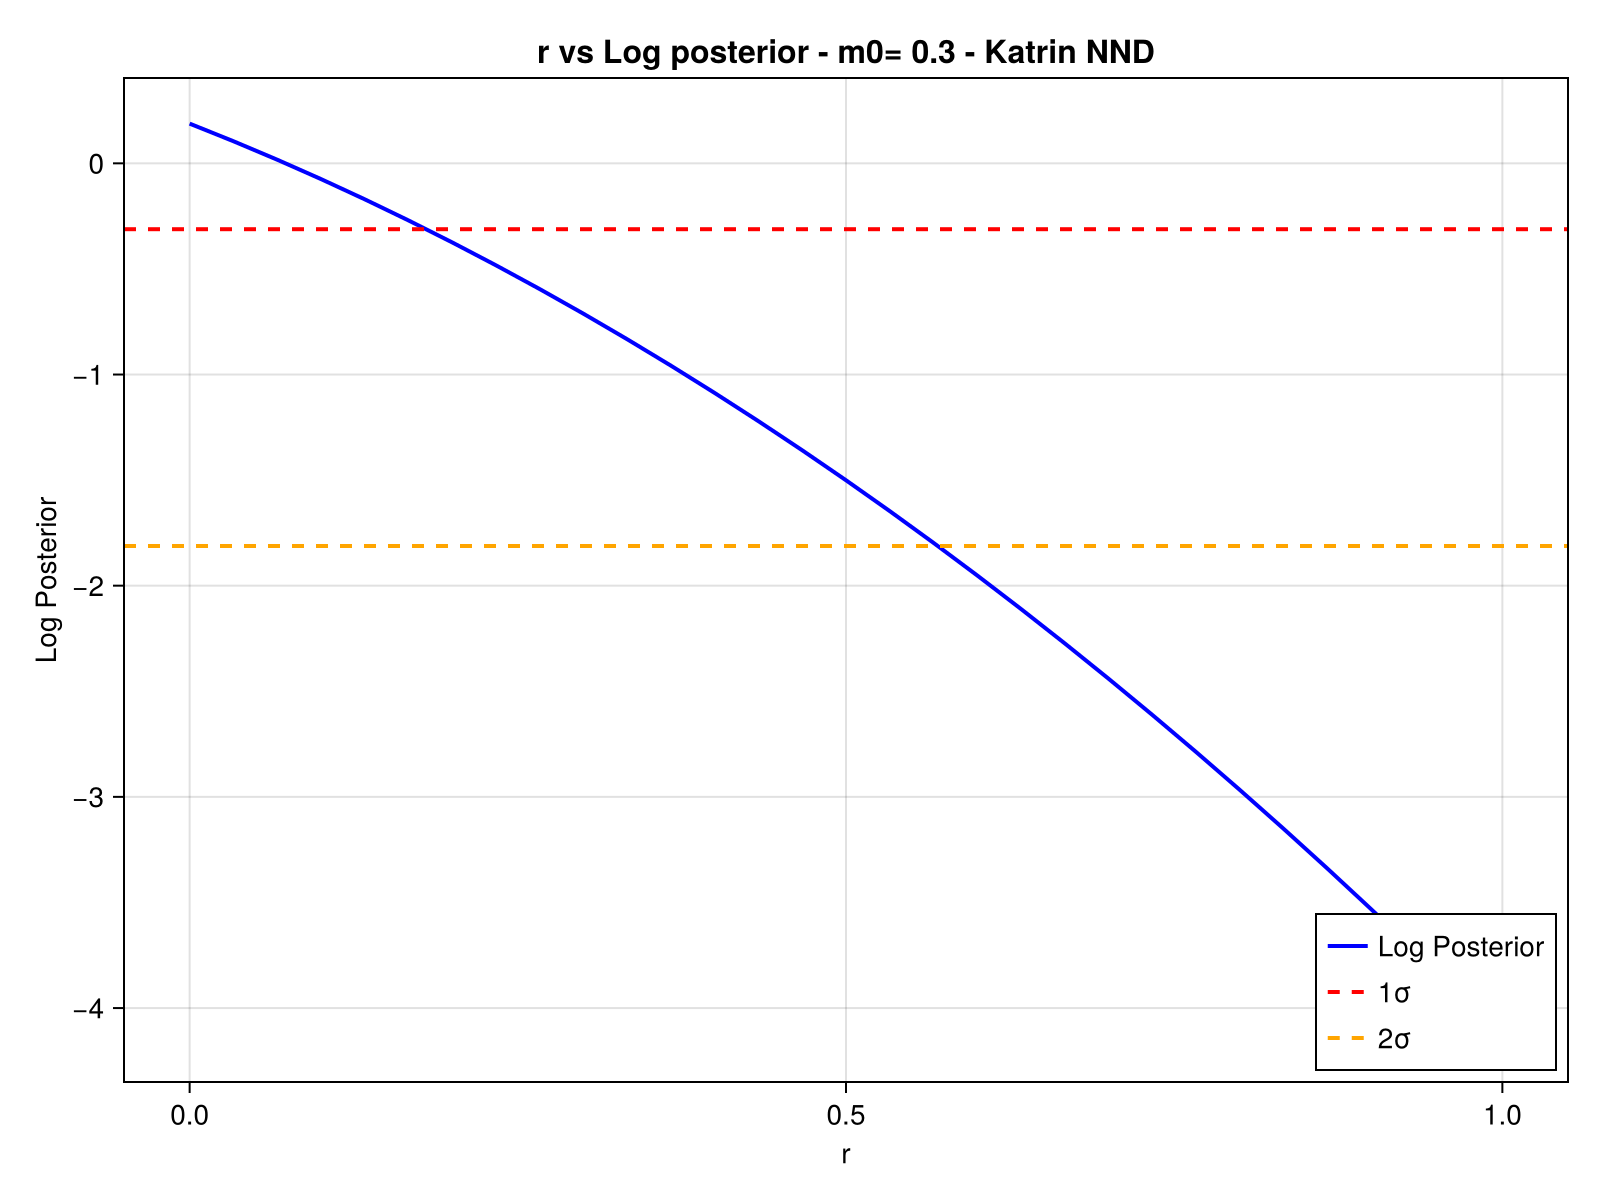

In [18]:

#value of m0 fixed
m0fixed =0.3
m0max=2
m0index = round(Int, 31/m0max* m0fixed)
println("m0index: ", m0index)

#calsculate the best fit
bf = Newtrinos.bestfit(result)

# Calculate confidence intervals
sigma_1_threshold = maximum(result.values.log_posterior[:, m0index ]) - 0.5
sigma_2_threshold = maximum(result.values.log_posterior[:, m0index ]) - 2.0

# Create the plot
fig = Figure(resolution = (800, 600))
ax = Axis(fig[1, 1],
    xlabel = "r",
    ylabel = "Log Posterior",
    title = "r vs Log posterior - m0= $m0fixed - Katrin NND",
    titlesize = 16,
    xlabelsize = 14,
    ylabelsize = 14
)

# Plot the main curve
lines!(ax, result.axes.r, result.values.log_posterior[:, m0index],
    color = :blue,
    linewidth = 2,
    label = "Log Posterior"
)

# Add confidence level lines
hlines!(ax, [sigma_1_threshold], 
    color = :red, 
    linestyle = :dash, 
    linewidth = 2,
    label = "1σ"
)

hlines!(ax, [sigma_2_threshold], 
    color = :orange, 
    linestyle = :dash, 
    linewidth = 2,
    label = "2σ"
)

# Add legend
axislegend(ax, position = :rb)  # right bottom

display("image/png", fig)
#save("/home/sofialon/Newtrinos.jl/profiled plot/katrin/katrin_rLogpost_NND_N=50_m0=$m0fixed.png", fig)
